# Data Analysis on Airline Passenger Satisfaction Dataset 

## INTRODUCTION

In the fiercely competitive aviation industry, every business aspires to differentiate itself and win over customers. The quality of customer service offered to customers may be the only differentiator in the airline industry. For airlines, the customer experience is always first and foremost. Less revenue and fewer passengers are always the results of unhappy or disengaged customers. Every time a client travels, a great experience is essential.

 - This data set contains a survey on air passenger satisfaction survey.We Need to predict Airline passenger satisfaction level:1.Satisfaction 2.Neutral or dissatisfied.

Select the best predictive models for predicting passengers satisfaction.

 - Key Observations

1. This is a binary classification problem, it is necessary to predict which of the two levels of satisfaction with the airline    the passenger belongs to: 
     A.Satisfaction
     B. Neutral or dissatisfied.

2. Before diving into the data, thinking intuitively the main factors should be:
   Delays in the flight
   Staff efficiency to address customer needs
   Services provided in the flight

##  Importing the required libraries

In [1]:



# data analysis packages 
import numpy as np
import pandas as pd


# data visualization pakages
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from pylab import rcParams
import missingno as msno


# general tools
import re
import joblib
import json
import warnings


# sklearn library
import sklearn

# sklearn processing tools
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score,auc,roc_auc_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,RobustScaler
from sklearn.preprocessing import QuantileTransformer,PowerTransformer,FunctionTransformer


# error matrices
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,plot_confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


# Macjine learning classification models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
import lightgbm as lgb


# cross validation
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

## initial settings

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (8,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set(rc={'font.size':10,'axes.titlesize':10,'axes.labelsize':15},style='darkgrid')

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth',None)

## Loading the dataset

In [3]:
train_df = pd.read_csv('C:/Users/Shahrukh/python/data sets/airline passenger satisfaction/train.csv')
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Information about the dataset.

 - There is the following information about the passengers of some airline:

Gender: male or female.

Customer type: regular or non-regular airline customer

Age: the actual age of the passenger

Type of travel: the purpose of the passenger's flight (personal or business travel)

Class: business, economy, economy plus

Flight distance

Inflight wifi service: satisfaction level with Wi-Fi service on board (0: not rated; 1-5)

Departure/Arrival time convenient: departure/arrival time satisfaction level (0: not rated; 1-5)

Ease of Online booking: online booking satisfaction rate (0: not rated; 1-5)

Gate location: level of satisfaction with the gate location (0: not rated; 1-5)

Food and drink: food and drink satisfaction level (0: not rated; 1-5)

Online boarding: satisfaction level with online boarding (0: not rated; 1-5)

Seat comfort: seat satisfaction level (0: not rated; 1-5)

Inflight entertainment: satisfaction with inflight entertainment (0: not rated; 1-5)

On-board service: level of satisfaction with on-board service (0: not rated; 1-5)

Leg room service: level of satisfaction with leg room service (0: not rated; 1-5)

Baggage handling: level of satisfaction with baggage handling (0: not rated; 1-5)

Checkin service: level of satisfaction with checkin service (0: not rated; 1-5)


Inflight service: level of satisfaction with inflight service (0: not rated; 1-5)

Cleanliness: level of satisfaction with cleanliness (0: not rated; 1-5)

Departure delay in minutes:

Arrival delay in minutes:

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction).

In [4]:
train_df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


#### 
 - The average delay in flights are 15 minutes, with a deviation of 38.

 - Median of the delays are 0, which means 50% of the flights from this data, were not delayed.

 - From above we can conclude that “Unnamed: 0” column is “ID” of that observation don’t give add on value to the dataset. we can drop this.



In [5]:
train_df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [6]:
train_df.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

# 
 - There are 103904 rows for 23 features in our data.

 - We see in the training data, that all the datatypes belong to a numeric class i.e. integer, float and object.

## Missing values

In [8]:
train_df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

## finding percentage of null values

In [9]:
null_df = train_df.isna().sum().sort_values(ascending=False).to_frame()
null_df.columns = ['no of nulls']
null_df['% null'] = round(null_df['no of nulls']/len(train_df)*100,2)
null_df

,no of nulls,% null
Arrival Delay in Minutes,310,0.3
Gender,0,0.0
Seat comfort,0,0.0
Departure Delay in Minutes,0,0.0
Cleanliness,0,0.0
Inflight service,0,0.0
Checkin service,0,0.0
Baggage handling,0,0.0
Leg room service,0,0.0
On-board service,0,0.0


# 
 - The ‘arrival delay in minutes’ has some null values that is 310(0.3%) , Let’s visualize this to see any patterns in the missing values


## visualizing NaN values using missingno library

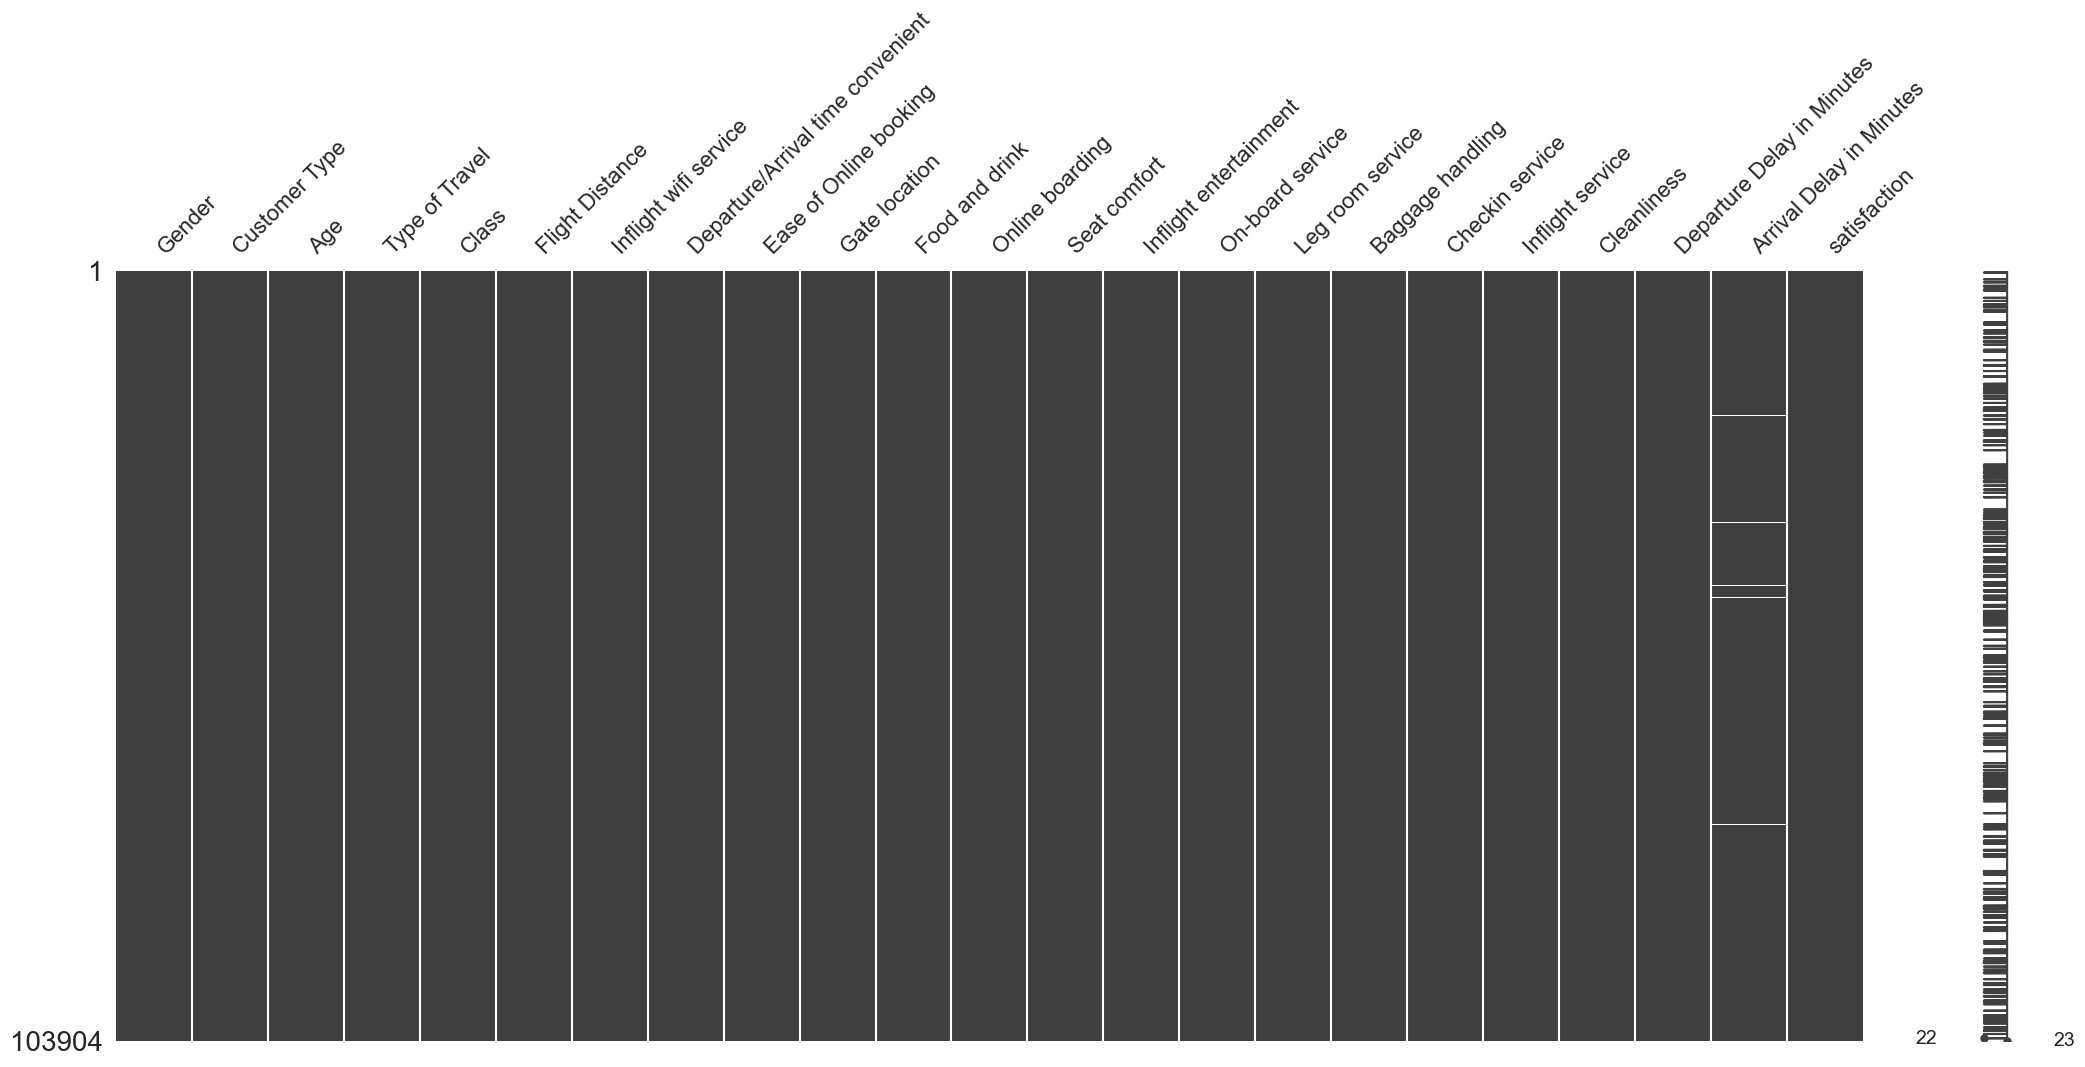

In [10]:
msno.matrix(train_df);

##  checking for duplicates

In [11]:
train_df.duplicated().sum()

0

# 
 - There is no duplicate values present in the dataset.

##  Dependent Variable or Feature

In [12]:
train_df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

# 
 - In this dataset we Need to predict Airline passenger satisfaction level: 1.Satisfaction 2.Neutral or dissatisfied.

 - Hence the target variable is ‘satisfaction’.

## Check if the dependent variable is balanced or not

In [13]:
train_df["satisfaction"].value_counts()[1]

45025

In [14]:
train_df["satisfaction"].value_counts()[0]

58879

In [15]:
round(train_df['satisfaction'].value_counts()[1]/(train_df['satisfaction'].value_counts()[0]+train_df['satisfaction'].value_counts()[1])*100,2)

43.33

# 
 - This problem is a binary classification problem of classes 0 or 1 denoting customers satisfaction, The class 1 has only 43.33% total values.

 - Hence, this is an balanced learning problem. Hence will not be requiring any resampling techniques to tackle this.

## Independent Variables or Features

In [16]:
train_df.columns[:-1]

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

# 
 - These are all independent variables or features

##  exploratory data analysis and visualization

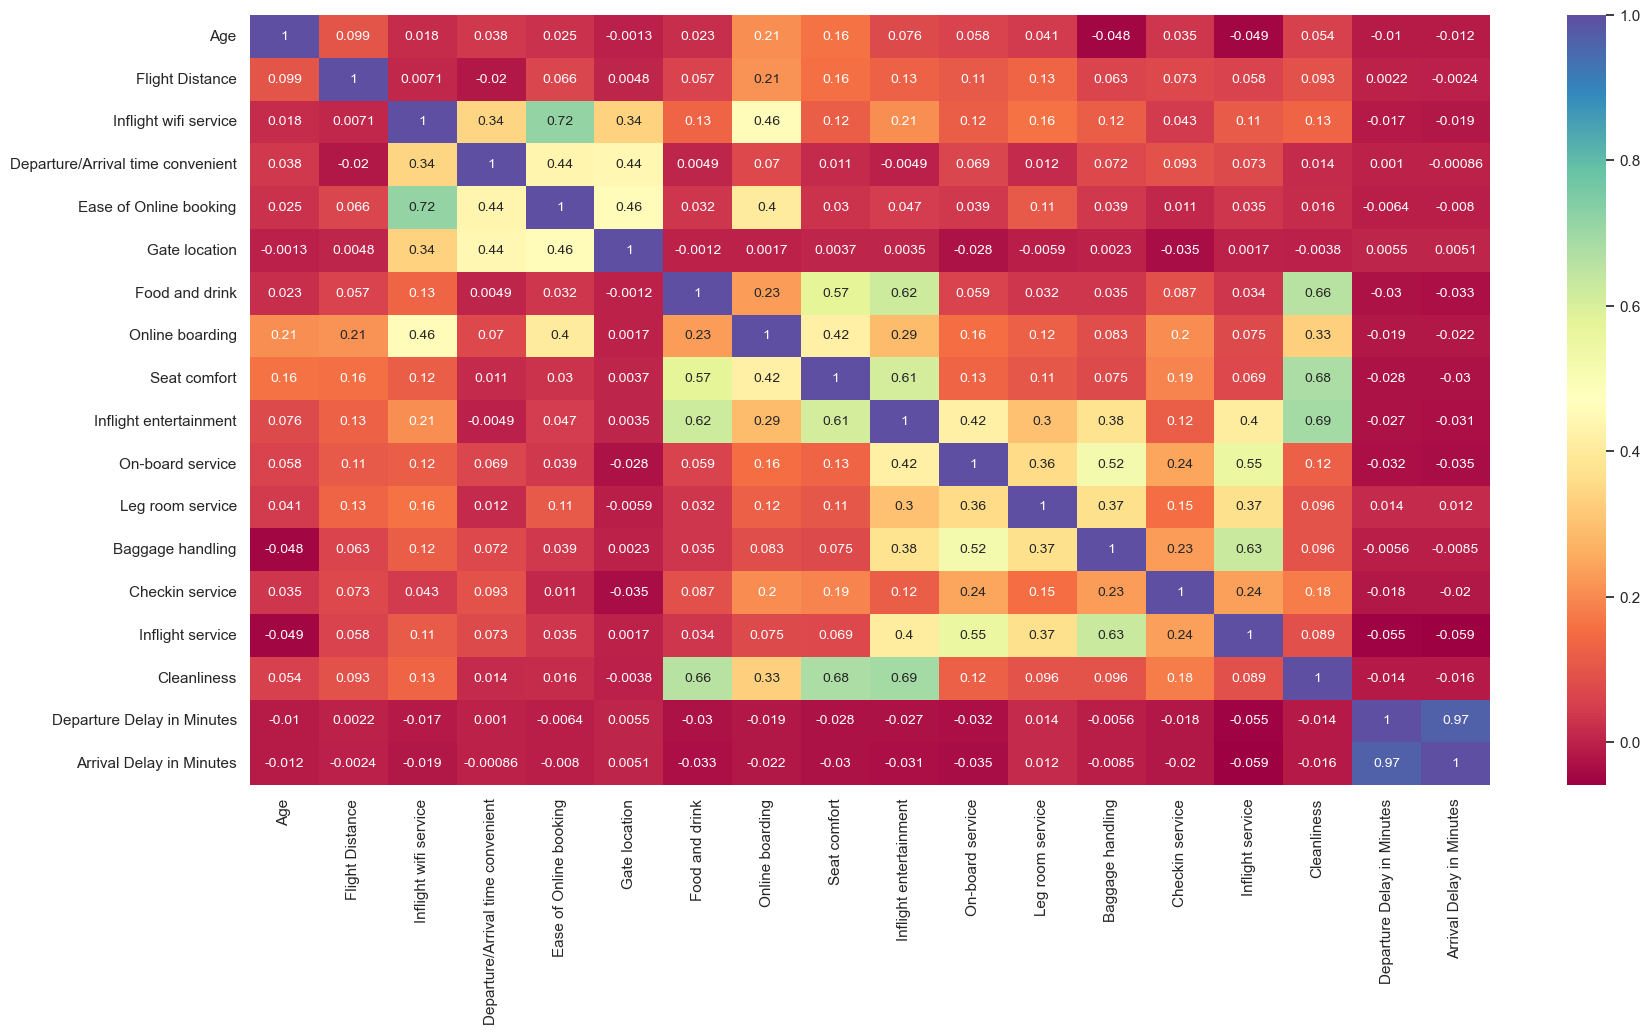

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(train_df.corr(),annot=True,cmap='Spectral')
plt.show()

# 
 - Departure delay in minutes and arrival day in minutes are highly co related.

##  data distribution graphs

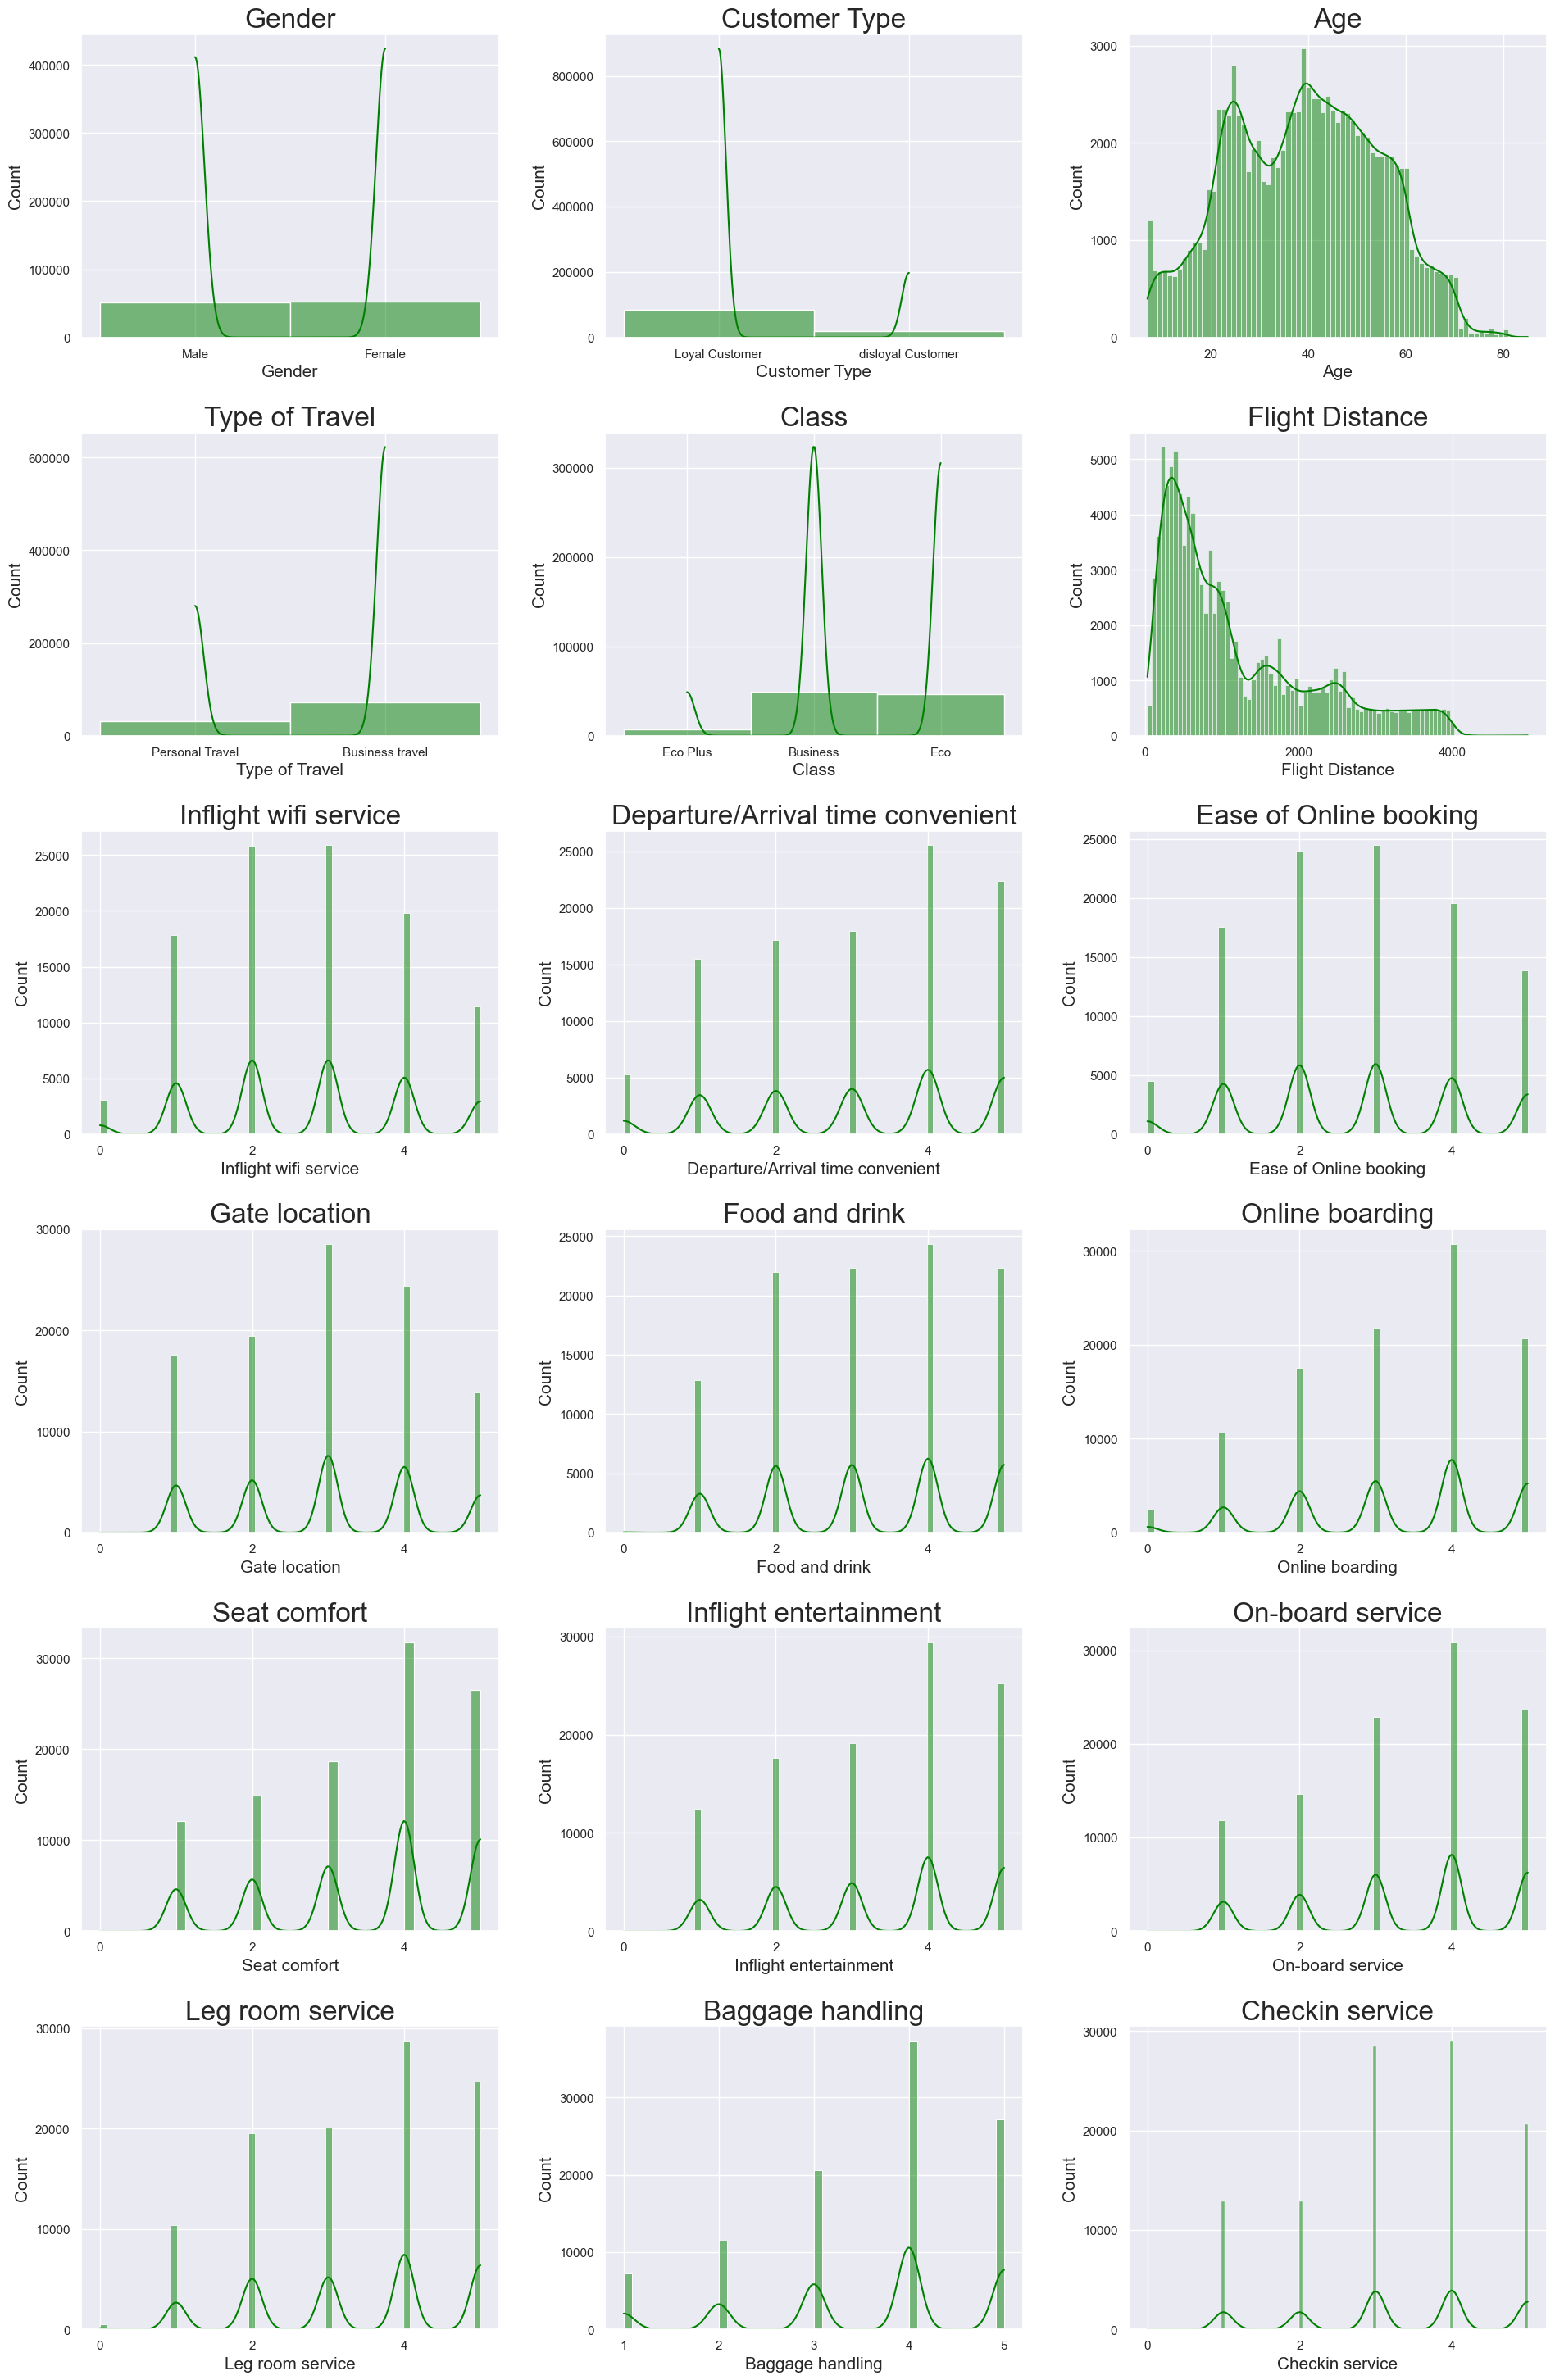

In [18]:
sns.set(rc={"font.size":15,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid")
fig, axs = plt.subplots(6, 3, figsize=(20,30))
fig.tight_layout(pad=4.0)

for i,ax in zip(train_df,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.histplot(ax=ax,data=train_df,x=train_df[i],kde=True,color='green')
    ax.set_title(i)

## Pie chart percentage distribution features

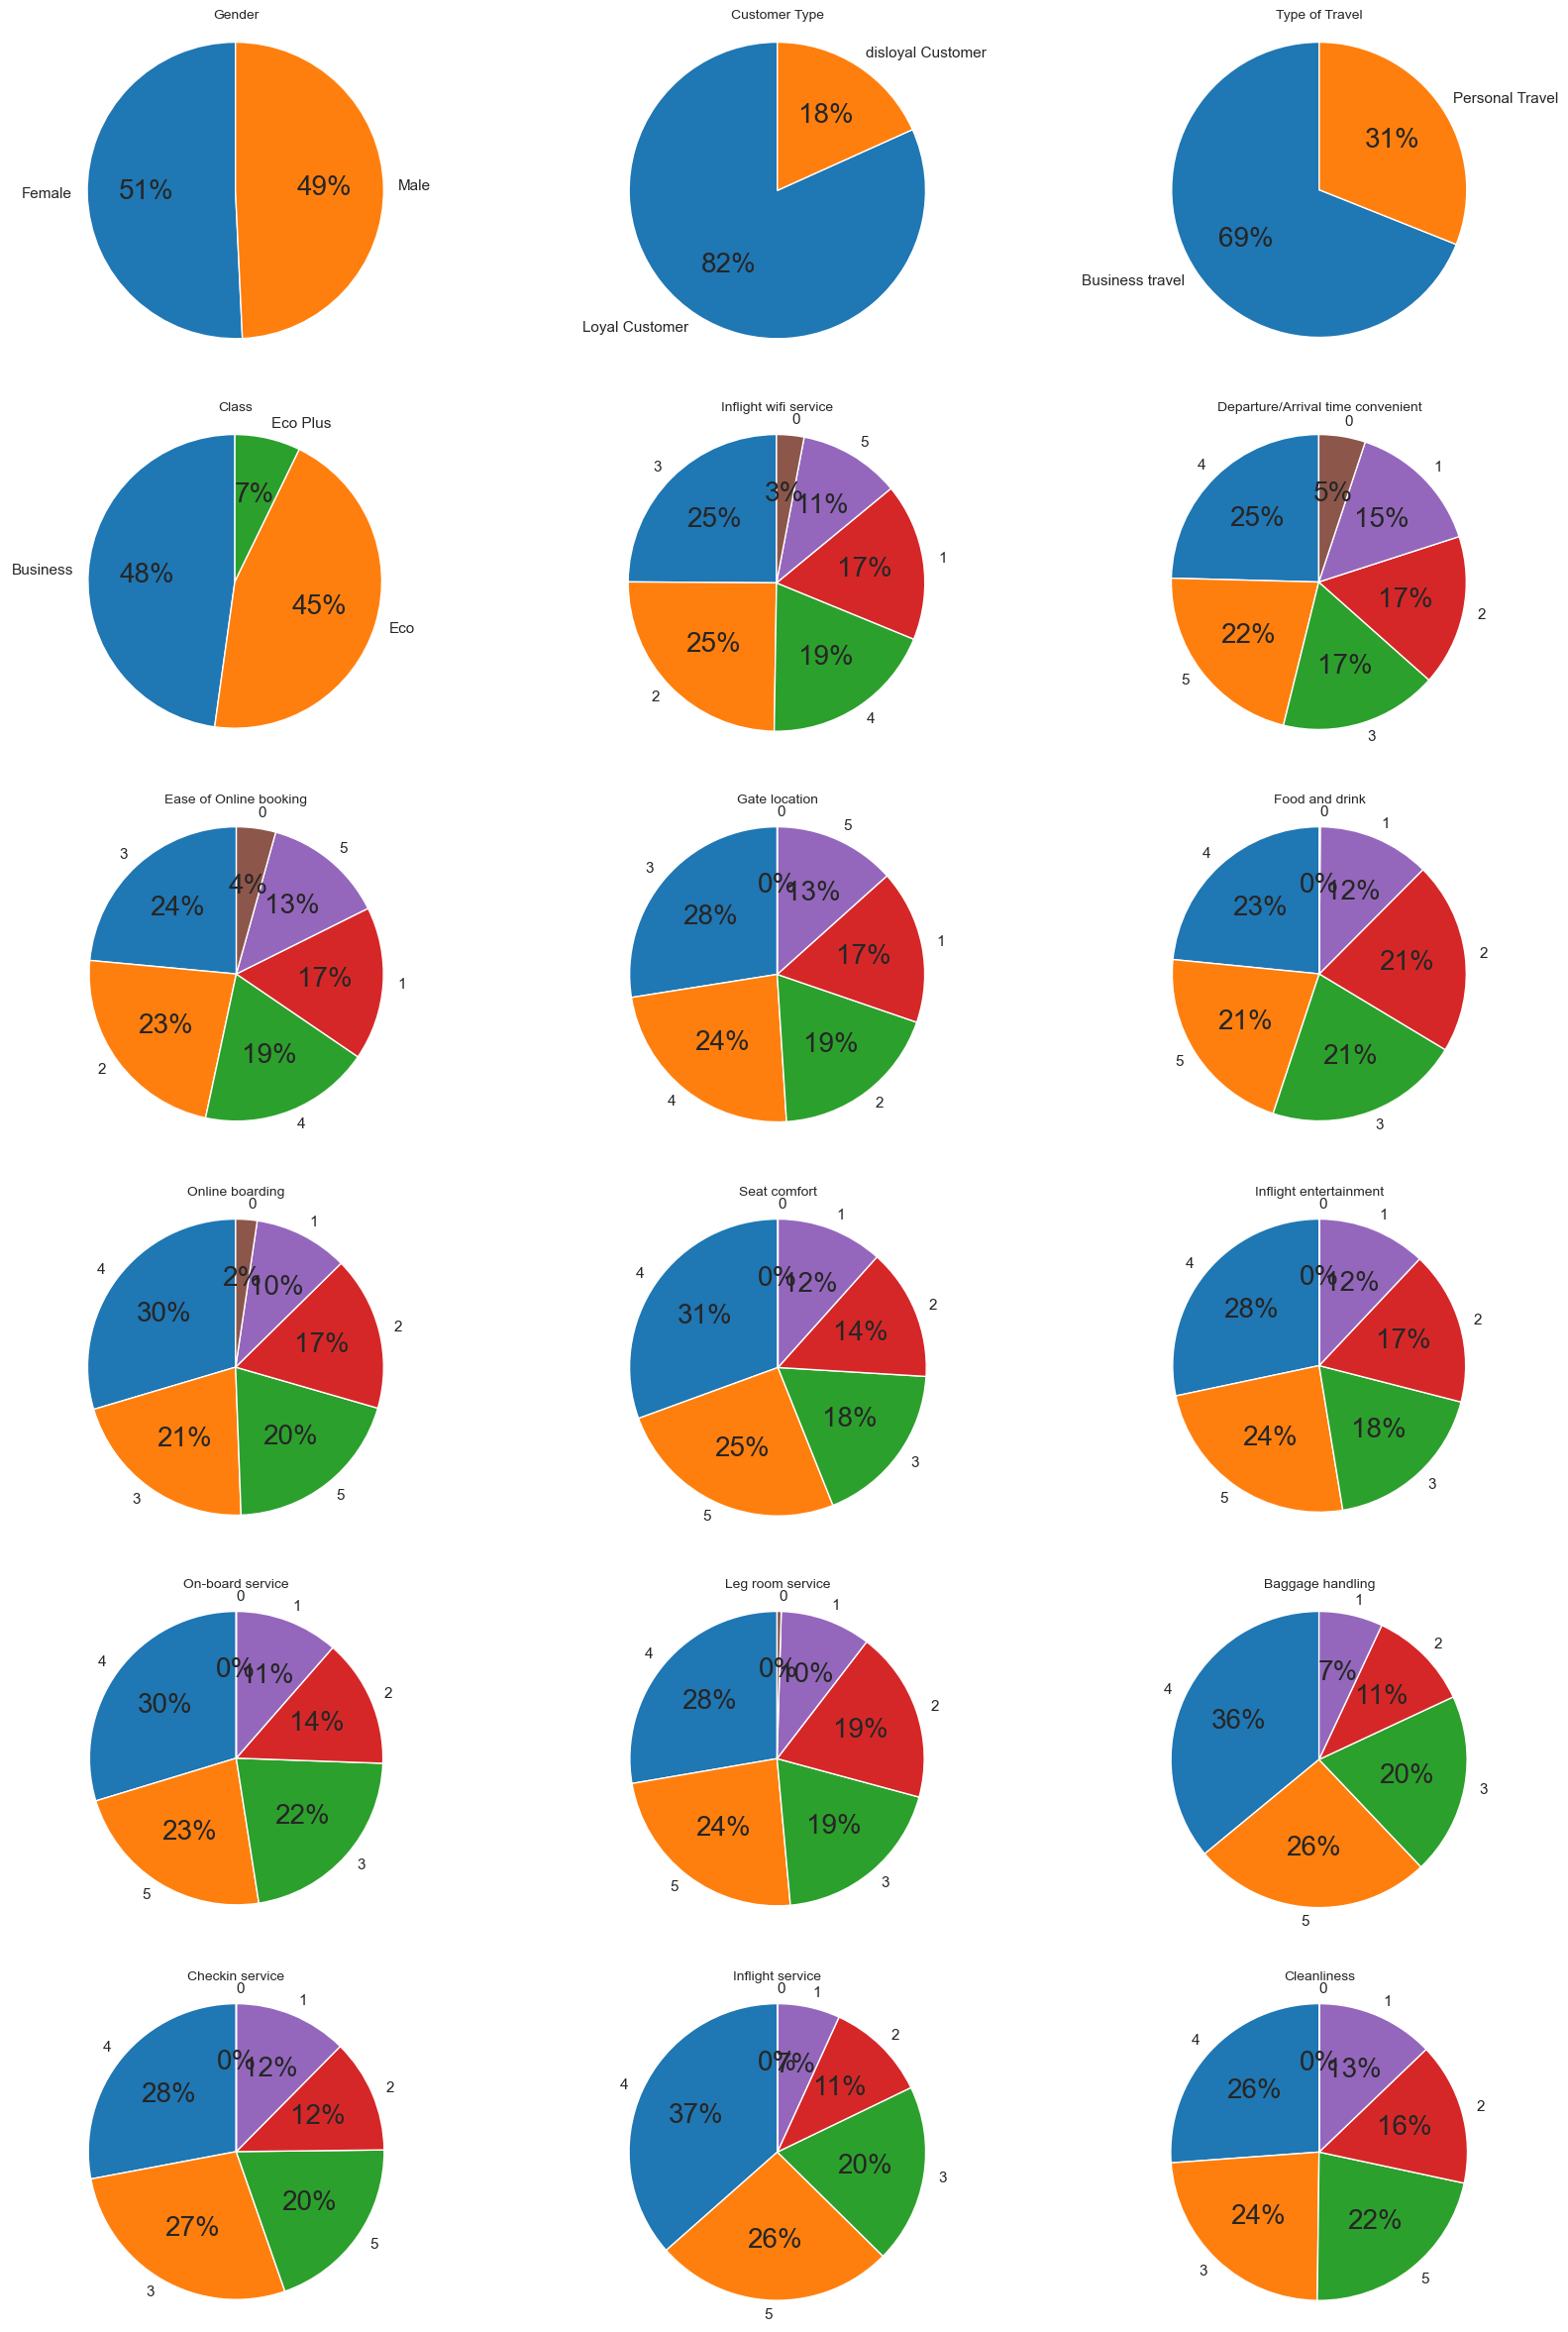

In [19]:
new_train_df = train_df.copy()
new_train_df.drop(['Age','Flight Distance','Departure Delay in Minutes',
                              'satisfaction','Arrival Delay in Minutes'],axis=1,inplace=True)
sns.set(rc={'font.size':20,'axes.titlesize':10,'axes.labelsize':13},style='darkgrid')
fig, axes = plt.subplots(6,3,figsize = (20,30))
for i, col in enumerate(new_train_df):
    column_values = new_train_df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3,i%3].pie(sizes,labels=labels,colors=sns.color_palette('tab10'),autopct = '%1.0f%%',startangle = 90)
    axes[i//3,i%3].axis('equal')
    axes[i//3,i%3].set_title(col)
plt.show()

# 
Observations:

 - The number of men and women in this sample is approximately the same.

 - The vast majority of the airline’s customers are repeat customers.

 - Most of our clients flew for business rather than personal reasons.

 - About half of the passengers were in business class.

 - More than 60% of passengers were satisfied with the luggage transportation service (rated 4–5 out of 5).

 - More than 50% of passengers were comfortable sitting in their seats (rated 4–5 out of 5).

##  EDA on feature ‘Satisfaction’

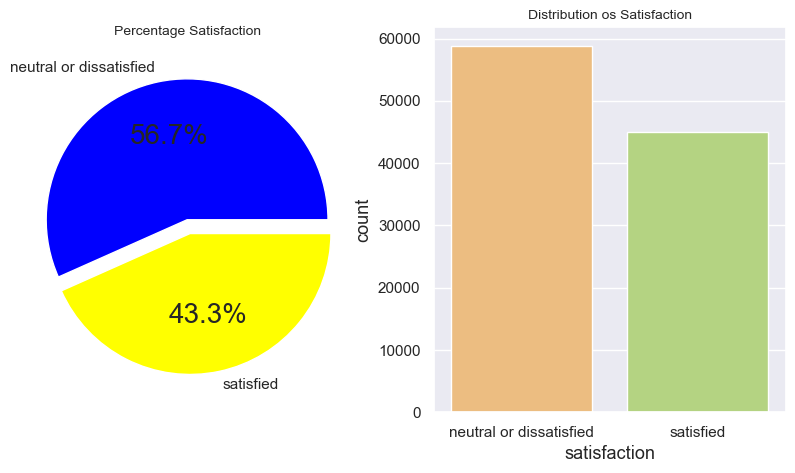

In [20]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.pie(train_df['satisfaction'].value_counts(),explode=(0,0.1),colors=('blue','yellow'),labels=train_df['satisfaction'].unique(),
        autopct='%1.1f%%')
ax1.set_title('Percentage Satisfaction')


sns.countplot(x=train_df['satisfaction'],data=train_df,palette='RdYlGn',ax=ax2)
ax2.set_title('Distribution os Satisfaction')
plt.show()

# 
Observations:

 - As per the given data 56.7% people are dissatisfied and neutral.

 - And 43.3% people are satisfied.

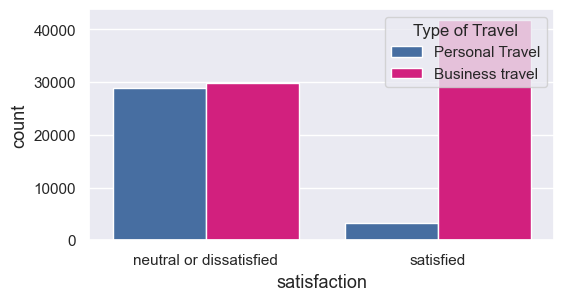

In [21]:
plt.figure(figsize=(6,3))
sns.countplot(train_df['satisfaction'],hue=train_df['Type of Travel'],palette=sns.color_palette('Accent')[4:6])
plt.show()

# 
 - Business Travelers seems to be more satisfied with the flight, than the personal travelers

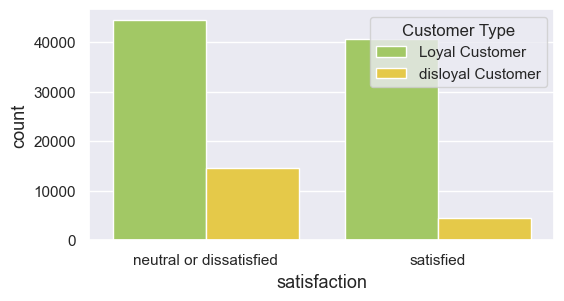

In [22]:
plt.figure(figsize=(6,3))
sns.countplot(train_df['satisfaction'],hue=train_df['Customer Type'],palette=sns.color_palette('Set2')[4:6])
plt.show()

# 
 - Number of loyal customers for this airline is high, however, the dissatisfaction level is high irrespective of the loyalty. 

 - Airline will have to work on maintaining the loyal customers

## EDA Inferences
 - Gender doesn’t play an important role in the satisfaction, as men and women seems to equally concerned about the same factors.

 - Number of loyal customers for this airline is high, however, the dissatisfaction level is high irrespective of the loyalty. 

 - Airline will have to work on maintaining the loyal customers

 - Business Travelers seems to be more satisfied with the flight, than the personal travelers

 - People in business class seems to be the most satisfied lot, and those in economy class are least satisfied

 - The most important takeaway here is the longer the flight distance, most passengers are okay with a slight delay in    departure, which is a strange finding from this plot!

 - So departure delay is less of a factor for a long distance flight, comparatively, however, short distance travelers does not 
   seem to be excited about the departure delays, which also makes sense.

 - The most of the airline’s regular customers are between the ages of 30 and 50 (their average age is slightly over 40).

 - The age range of non-regular customers is slightly smaller (from 25 to 40 years old, on average — a little less than 30).

 - Customers whose flight distance is long, mostly fly in business class.

 - The more distance an aircraft passenger travels (respectively, the longer they are in flight)

 - The more they are satisfied with the entertainment in flight and the extra legroom (on average).

## Data Preprocessing and Feature Engineering

### Numerical and categorical features

In [23]:
# numeric columns
numeric_cols = train_df.select_dtypes(include=np.number).columns.to_list()
print('No. of numeric columns are :',len(numeric_cols))
print(numeric_cols)

No. of numeric columns are : 18
['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [24]:
# categorical features
categorical_cols = train_df.select_dtypes('object').columns.to_list()
print('No. of categorical columns are :',len(categorical_cols))
print(categorical_cols)

No. of categorical columns are : 5
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


# 
 - There are total 18 Numeric columns, and 5 categorical columns.

##  Encoding

In [25]:
le = LabelEncoder()
train_df = train_df.apply(le.fit_transform)

##  Scaling

In [26]:
scaler = MinMaxScaler()
scaler.fit_transform(train_df)

array([[1.        , 0.        , 0.08108108, ..., 0.05617978, 0.03956044,
        0.        ],
       [1.        , 1.        , 0.24324324, ..., 0.00224719, 0.01318681,
        0.        ],
       [0.        , 0.        , 0.25675676, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.31081081, ..., 0.01573034, 0.03076923,
        0.        ],
       [0.        , 1.        , 0.2027027 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.27027027, ..., 0.        , 0.        ,
        0.        ]])

##  Train Test Split

In [27]:
x = train_df[['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
y = train_df['satisfaction']


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

y_pred_log_reg = log_reg.predict(x_test)
accuracy_score(y_test,y_pred_log_reg)

0.8112217891343054

In [29]:
print(classification_report(y_test,y_pred_log_reg,target_names=['neutral or dissatisfaction', 'satisfaction']))
print('roc_auc_score:',roc_auc_score(y_test,y_pred_log_reg))

                            precision    recall  f1-score   support

neutral or dissatisfaction       0.85      0.81      0.83     11735
              satisfaction       0.77      0.82      0.79      9046

                  accuracy                           0.81     20781
                 macro avg       0.81      0.81      0.81     20781
              weighted avg       0.81      0.81      0.81     20781

roc_auc_score: 0.811813110494004


# 
  - The auccuracy score for Logistic Regression is 83%

## Gaussian Naive Bayes

In [30]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
accuracy_score(y_test,y_pred_gnb)

0.858043405033444

In [31]:
print(classification_report(y_test,y_pred_gnb,target_names=['neutral or dissatisfaction', 'satisfaction']))
print('roc_auc_score:',roc_auc_score(y_test,y_pred_gnb))

                            precision    recall  f1-score   support

neutral or dissatisfaction       0.86      0.90      0.88     11735
              satisfaction       0.86      0.81      0.83      9046

                  accuracy                           0.86     20781
                 macro avg       0.86      0.85      0.85     20781
              weighted avg       0.86      0.86      0.86     20781

roc_auc_score: 0.8524343692009811


#   
   - The auccuracy score for Gaussian Naive Bayes is 86%

## SVM(Support Vector Machine)

In [32]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
accuracy_score(y_test,y_pred_svc)

0.8241181848804197

In [33]:
print(classification_report(y_test,y_pred_svc,target_names=['neutral or dissatisfaction', 'satisfaction']))
print('roc_auc_score:',roc_auc_score(y_test,y_pred_svc))

                            precision    recall  f1-score   support

neutral or dissatisfaction       0.89      0.78      0.83     11735
              satisfaction       0.76      0.88      0.81      9046

                  accuracy                           0.82     20781
                 macro avg       0.82      0.83      0.82     20781
              weighted avg       0.83      0.82      0.82     20781

roc_auc_score: 0.8301979486374664


# 
 - The auccuracy score for SVM is 84%

##  K-Nearest Neighbours

In [34]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.7420720850777153

In [35]:
print(classification_report(y_test,y_pred_knn,target_names=['neutral or dissatisfaction', 'satisfaction']))
print('roc_auc_score:',roc_auc_score(y_test,y_pred_knn))

                            precision    recall  f1-score   support

neutral or dissatisfaction       0.76      0.80      0.78     11735
              satisfaction       0.72      0.66      0.69      9046

                  accuracy                           0.74     20781
                 macro avg       0.74      0.73      0.73     20781
              weighted avg       0.74      0.74      0.74     20781

roc_auc_score: 0.7331330016981802


# 
 - The auccuracy score for KNN is 74%

##  SGDClassifier

In [36]:
sgdc = SGDClassifier()
sgdc.fit(x_train,y_train)
y_pred_sgdc = sgdc.predict(x_test)
accuracy_score(y_test,y_pred_sgdc)

0.8436552620181897

In [37]:
print(classification_report(y_test,y_pred_sgdc,target_names=['neutral or dissatisfaction', 'satisfaction']))
print('roc_auc_score:',roc_auc_score(y_test,y_pred_sgdc))

                            precision    recall  f1-score   support

neutral or dissatisfaction       0.82      0.92      0.87     11735
              satisfaction       0.88      0.74      0.80      9046

                  accuracy                           0.84     20781
                 macro avg       0.85      0.83      0.84     20781
              weighted avg       0.85      0.84      0.84     20781

roc_auc_score: 0.8317787860955146


# 
 - The auccuracy score for SGDClassifier is 68%

## Decision Tree Classifier

In [38]:
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
y_pred_d_tree = d_tree.predict(x_test)
accuracy_score(y_test,y_pred_d_tree)

0.9465377027092056

In [39]:
print(classification_report(y_test,y_pred_d_tree,target_names=['neutral or dissatisfaction', 'satisfaction']))
print('roc_auc_score:',roc_auc_score(y_test,y_pred_d_tree))

                            precision    recall  f1-score   support

neutral or dissatisfaction       0.95      0.95      0.95     11735
              satisfaction       0.94      0.94      0.94      9046

                  accuracy                           0.95     20781
                 macro avg       0.95      0.95      0.95     20781
              weighted avg       0.95      0.95      0.95     20781

roc_auc_score: 0.9454183281944549


# 
 - The auccuracy score for Decision Tree is 94%

##  Random Forest Classifier

In [40]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
accuracy_score(y_test,y_pred_rfc)

0.9612626918820076

In [41]:
print(classification_report(y_test,y_pred_rfc,target_names=['neutral or dissatisfaction', 'satisfaction']))
print('roc_auc_score:',roc_auc_score(y_test,y_pred_rfc))

                            precision    recall  f1-score   support

neutral or dissatisfaction       0.95      0.98      0.97     11735
              satisfaction       0.97      0.94      0.95      9046

                  accuracy                           0.96     20781
                 macro avg       0.96      0.96      0.96     20781
              weighted avg       0.96      0.96      0.96     20781

roc_auc_score: 0.9584055870855027


# 
 - The auccuracy score for Random Forest is 96%

## Adaboost Classifier

In [42]:
adaboost = AdaBoostClassifier()
adaboost.fit(x_train,y_train)
y_pred_ada = adaboost.predict(x_test)
accuracy_score(y_test,y_pred_ada)

0.9253645156633463

In [43]:
print(classification_report(y_test,y_pred_ada,target_names=['neutral or dissatisfaction', 'satisfaction']))
print('roc_auc_score:',roc_auc_score(y_test,y_pred_ada))

                            precision    recall  f1-score   support

neutral or dissatisfaction       0.93      0.94      0.93     11735
              satisfaction       0.92      0.91      0.91      9046

                  accuracy                           0.93     20781
                 macro avg       0.92      0.92      0.92     20781
              weighted avg       0.93      0.93      0.93     20781

roc_auc_score: 0.923086664655139


# 
 - The auccuracy score for AdaBoost Classifier is 92%

##  Gradient Boosting Classifier

In [44]:
g_boost = GradientBoostingClassifier()
g_boost.fit(x_train,y_train)
y_pred_g_boost = g_boost.predict(x_test)
accuracy_score(y_test,y_pred_g_boost)

0.9400413839564987

In [45]:
print(classification_report(y_test,y_pred_g_boost,target_names=['neutral or dissatisfaction', 'satisfaction']))
print('roc_auc_score:',roc_auc_score(y_test,y_pred_g_boost))

                            precision    recall  f1-score   support

neutral or dissatisfaction       0.94      0.96      0.95     11735
              satisfaction       0.95      0.91      0.93      9046

                  accuracy                           0.94     20781
                 macro avg       0.94      0.94      0.94     20781
              weighted avg       0.94      0.94      0.94     20781

roc_auc_score: 0.9370445531389487



 - The auccuracy score for Gradient Boost Classifier is 94%

## Gradient Boosting Machine (XGBoost)

In [46]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)
accuracy_score(y_test,y_pred_xgb)

0.9617920215581541

In [47]:
print(classification_report(y_test,y_pred_xgb,target_names=['neutral or dissatisfaction', 'satisfaction']))
print('roc_auc_score:',roc_auc_score(y_test,y_pred_xgb))

                            precision    recall  f1-score   support

neutral or dissatisfaction       0.95      0.98      0.97     11735
              satisfaction       0.97      0.94      0.96      9046

                  accuracy                           0.96     20781
                 macro avg       0.96      0.96      0.96     20781
              weighted avg       0.96      0.96      0.96     20781

roc_auc_score: 0.9590895834112463


# 
 - The auccuracy score for XGBoost Classifier is 96%

## Putting all the model's prediction in single function

In [48]:

models_list = [log_reg,gnb,svc,knn,sgdc,d_tree,rfc,adaboost,g_boost,xgb]
model_name_list = ['Logistic Reg','Guassian NB','SVM','KNN','SGDC','Decision Tree','Random Forest Clf','AdaBoost',
                   'Gradient Boost','XGBoost']

for clf in models_list:
    clf.fit(x_train,y_train)
    
train_accuracy_list = []
test_accuracy_list = []

for clf,name in zip(models_list,model_name_list):
    y_pred_test = clf.predict(x_test)
    y_pred_train = clf.predict(x_train)
    
    print(name,':','\n','Train Accuracy:',accuracy_score(y_train,y_pred_train),'\n','Test Accuracy:',accuracy_score(y_test,y_pred_test),'\n\n\n')
    
    train_accuracy_list.append(accuracy_score(y_train,y_pred_train))
    test_accuracy_list.append(accuracy_score(y_test,y_pred_test))

Logistic Reg : 
 Train Accuracy: 0.8149489311021018 
 Test Accuracy: 0.8112217891343054 



Guassian NB : 
 Train Accuracy: 0.8651396123816513 
 Test Accuracy: 0.858043405033444 



SVM : 
 Train Accuracy: 0.837397591520999 
 Test Accuracy: 0.8308551080313749 



KNN : 
 Train Accuracy: 0.8323809294659721 
 Test Accuracy: 0.7420720850777153 



SGDC : 
 Train Accuracy: 0.7773420112363606 
 Test Accuracy: 0.7735912612482556 



Decision Tree : 
 Train Accuracy: 1.0 
 Test Accuracy: 0.9473557576632501 



Random Forest Clf : 
 Train Accuracy: 1.0 
 Test Accuracy: 0.9616957797988547 



AdaBoost : 
 Train Accuracy: 0.9283712089313427 
 Test Accuracy: 0.9253645156633463 



Gradient Boost : 
 Train Accuracy: 0.9435896202013883 
 Test Accuracy: 0.9400413839564987 



XGBoost : 
 Train Accuracy: 0.977527278851822 
 Test Accuracy: 0.9617920215581541 





## Plotting all model's predictions

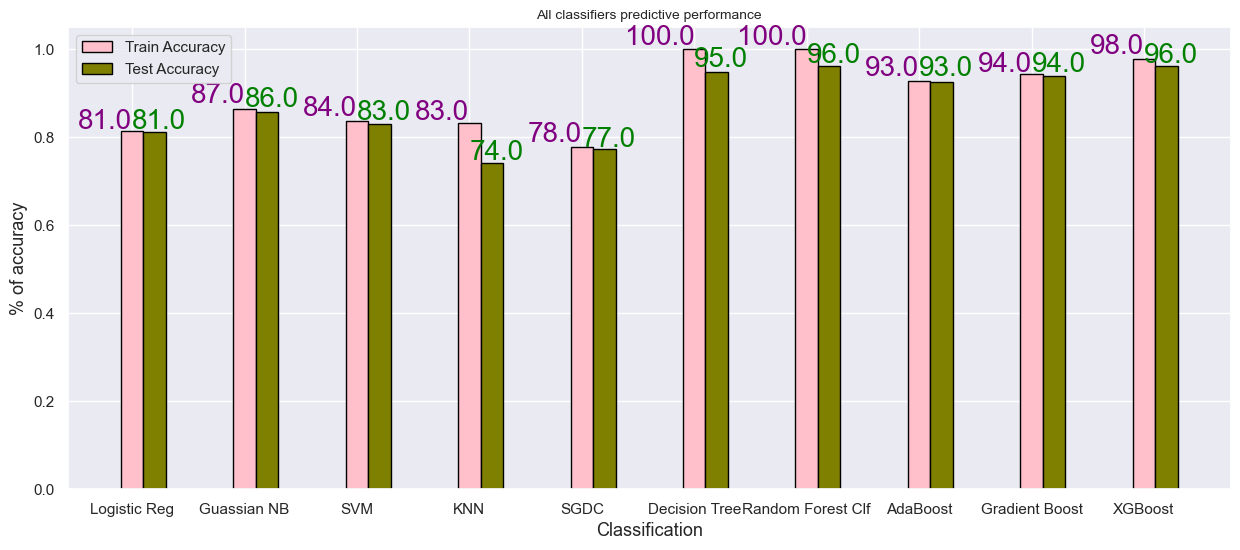

In [69]:
from importlib import reload
plt = reload(plt)


plt.figure(figsize=(15,6))
plt.xlabel("Classification")
plt.ylabel("% of accuracy")
plt.title("All classifiers predictive performance")
x = np.arange(10)
width = 0.2


plt.bar(x,train_accuracy_list,width=0.2,color='pink',label='Train Accuracy',edgecolor='black')
for i in range(len(train_accuracy_list)):
    plt.text(i,train_accuracy_list[i].round(2)+0.01,train_accuracy_list[i].round(2)*100,ha='right',color='purple')

    
plt.bar(x+0.2,test_accuracy_list,width=0.2,color='olive',label='Test Accuracy',edgecolor='black')
for j in range(len(test_accuracy_list)):
    plt.text(j,test_accuracy_list[j].round(2)+0.01,test_accuracy_list[j].round(2)*100,ha='left',color='green')


plt.xticks(x ,model_name_list)
plt.legend()
plt.show()

## Observations

#### - Clearly from the above graph we can predict that Xgboost and Gradient Boost are performing best for our model, so we can use them to train our model that we already did above.
 
#### - Random Forest and Decision Tree also yeild good scores, but their train accuracy is 1, which will cause overfitting.

# Conclusion


- The goal of the project was to build a model to find out The Airline passenger satisfaction level: 'neutral
  or dissatisfaction’, ‘satisfaction’.

- I have performed the data analysis, data preprocessing, and data modelling with multiple machine learning models to achieve     this.

- The model is performing very good with the test data too.

- This project has been a great exercise for me to understand the concepts of machine learning. 

- There are so many limitations with this model as the model is built only on the features that are provided in the dataset.
  There is always an improvement when it comes to Machine Learning models. 
  Thus, with limited resources and time I have developed a reasonable model. With more research and more time, the performance     of the model can be improved.

## Refrences

Scikit Learn, 2022. Scikit Learn Documentation https://scikit-learn.org/stable/about.html#citing-scikit-learn

Geeksforgeeks, 2022. Mchine Learning https://www.geeksforgeeks.org/machine-learning/?ref=ghm

wikipedia https://en.wikipedia.org/wiki/Machine_learning